In [595]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as pyplot

In [596]:
colab_path = 'ScadaData.txt'
local_path = 'C:\\Users\\hanna\\Desktop\\data\\ScadaData.txt'

scada_data = pd.read_csv(local_path, delimiter='\t',  parse_dates=True)
scada_data['dtTimeStamp'] = pd.to_datetime(scada_data['dtTimeStamp'])
data = scada_data[['dtTimeStamp','WindSpeedMean','WindDirectionMean', 'intObjectId']].groupby('dtTimeStamp').mean()[['WindSpeedMean','WindDirectionMean']][0:2000]
print(data.tail(100))

                     WindSpeedMean  WindDirectionMean
dtTimeStamp                                          
2019-08-14 04:40:00       3.011111         132.811111
2019-08-14 04:50:00       2.996296         134.166667
2019-08-14 05:00:00       2.981481         135.488889
2019-08-14 05:10:00       2.925926         138.229630
2019-08-14 05:20:00       2.692593         140.996296
...                            ...                ...
2019-08-14 20:30:00       4.744444         192.011111
2019-08-14 20:40:00       4.588889         190.214815
2019-08-14 20:50:00       4.725926         189.303704
2019-08-14 21:00:00       5.211111         193.203704
2019-08-14 21:10:00       5.344444         195.440741

[100 rows x 2 columns]


In [597]:
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt
import math

def get_predictions(data, column_name):
    X = data[[column_name]]
    size = int(len(X) * 0.1)
    train, test = X[0:size], X[size:len(X)]
    history = train
    predictions = pd.DataFrame(index=test.index, columns=[column_name])
    for i, row in test.iterrows():
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0].flatten()[0]
        predictions.loc[i][column_name] = yhat
        history.loc[i] = row[column_name]

    return predictions

data['WindDirectionMean'] = data['WindDirectionMean'].apply(math.radians)
wind_speed_predictions = get_predictions(data, 'WindSpeedMean')
wind_direction_predictions = get_predictions(data, 'WindDirectionMean')

data['WindDirectionMean'] = data['WindDirectionMean'].apply(math.degrees)

wind_direction_predictions['WindDirectionMean'] = wind_direction_predictions['WindDirectionMean'].apply(math.degrees)
all_predictions = pd.concat([wind_speed_predictions, wind_direction_predictions], axis='index')
print(all_predictions)


                    WindSpeedMean  WindDirectionMean
dtTimeStamp                                         
2019-08-02 09:20:00       3.06628                NaN
2019-08-02 09:30:00       3.27731                NaN
2019-08-02 09:40:00        3.1605                NaN
2019-08-02 09:50:00       3.22049                NaN
2019-08-02 10:00:00       3.57613                NaN
...                           ...                ...
2019-08-14 20:30:00           NaN         190.722831
2019-08-14 20:40:00           NaN         192.281410
2019-08-14 20:50:00           NaN         189.993481
2019-08-14 21:00:00           NaN         189.218047
2019-08-14 21:10:00           NaN         193.859336

[3600 rows x 2 columns]


In [598]:
all_predictions = pd.concat([wind_speed_predictions, wind_direction_predictions], axis=1)
print(all_predictions)

                    WindSpeedMean  WindDirectionMean
dtTimeStamp                                         
2019-08-02 09:20:00       3.06628         305.303084
2019-08-02 09:30:00       3.27731         325.686014
2019-08-02 09:40:00        3.1605         291.545736
2019-08-02 09:50:00       3.22049         247.450074
2019-08-02 10:00:00       3.57613         241.960998
...                           ...                ...
2019-08-14 20:30:00       5.06187         190.722831
2019-08-14 20:40:00       4.67499         192.281410
2019-08-14 20:50:00       4.55319         189.993481
2019-08-14 21:00:00       4.75884         189.218047
2019-08-14 21:10:00       5.32589         193.859336

[1800 rows x 2 columns]


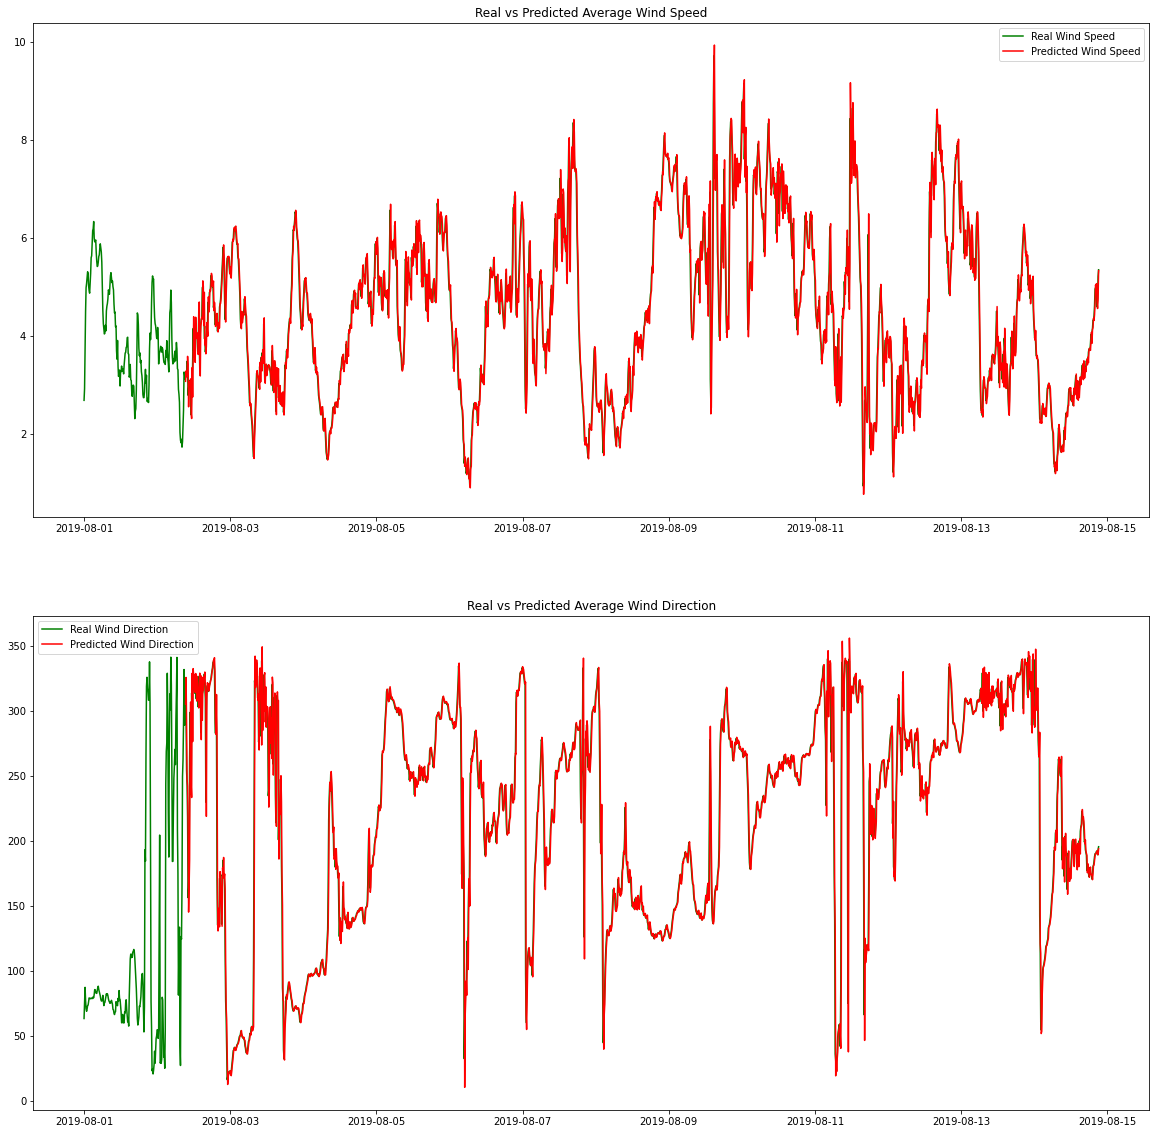

In [599]:
# plt.figure(figsize=(20,5))

fig, ax = plt.subplots(2, figsize=(20,20))
# plt.plot(all_predictions['WindDirectionMean'], color='red', label='Predicted Wind Direction')
# plt.plot(all_predictions['WindSpeedMean'], color='red', label='Predicted Wind Speed')
# plt.plot(data['WindDirectionMean'], color='green', label='Real Wind Direction')
# plt.plot(data['WindSpeedMean'], color='green', label='Real Wind Speed')

ax[0].plot(data['WindSpeedMean'], color='green', label='Real Wind Speed')
ax[0].plot(all_predictions['WindSpeedMean'], color='red', label='Predicted Wind Speed')


ax[1].plot(data['WindDirectionMean'], color='green', label='Real Wind Direction')
ax[1].plot(all_predictions['WindDirectionMean'], color='red', label='Predicted Wind Direction')

ax[0].set_title("Real vs Predicted Average Wind Speed")
ax[1].set_title("Real vs Predicted Average Wind Direction")

ax[0].legend()
ax[1].legend()

plt.savefig('ws_wd_baseline.jpg')

In [600]:
import os
import sys

new_path = r'C:\Users\hanna\Documents\GitHub\dissertation'
sys.path.append(new_path)

from api.noise_campaign.histogram import Histogram

In [601]:
#h = Histogram(3, 12, 1, 12)
h = Histogram(3.5, 6, 2, 6)
wind_speed_bins = h.get_wind_speed_bins()
wind_direction_bins = h.get_wind_direction_bins()

In [602]:
wind_speed_bins

{3.5: [2.5, 4.5],
 5.5: [4.5, 6.5],
 7.5: [6.5, 8.5],
 9.5: [8.5, 10.5],
 11.5: [10.5, 12.5],
 13.5: [12.5, 14.5]}

In [603]:
wind_direction_bins

{0.0: [-30.0, 30.0],
 60.0: [30.0, 90.0],
 120.0: [90.0, 150.0],
 180.0: [150.0, 210.0],
 240.0: [210.0, 270.0],
 300.0: [270.0, 330.0]}

In [604]:
import itertools
bins = [list(itertools.chain(*wind_speed_bins.values())), list(itertools.chain(*wind_direction_bins.values()))]

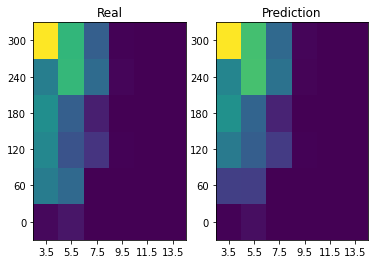

In [605]:
x_raw = data['WindSpeedMean']
y_raw = data['WindDirectionMean']
x_pred = all_predictions['WindSpeedMean']
y_pred = all_predictions['WindDirectionMean']

fig, axes = pyplot.subplots(1, 2)
axes[0].hist2d(x_raw, y_raw, bins=bins)
axes[0].title.set_text('Real')
axes[1].hist2d(x_pred, y_pred, bins=bins)
axes[1].title.set_text('Prediction')

axes[0].set_xticks(list(wind_speed_bins.keys()))
axes[0].set_yticks(list(wind_direction_bins.keys()))

axes[1].set_xticks(list(wind_speed_bins.keys()))
axes[1].set_yticks(list(wind_direction_bins.keys()))
       
pyplot.show()

In [606]:
data["SpeedBin"] = data['WindSpeedMean'].apply(h.get_wind_speed_bin)
data["DirectionBin"] = data['WindDirectionMean'].apply(h.get_wind_direction_bin)

all_predictions["PredictedSpeedBin"] = all_predictions['WindSpeedMean'].apply(h.get_wind_speed_bin)
all_predictions["PredictedDirectionBin"] = all_predictions['WindDirectionMean'].apply(h.get_wind_direction_bin)

In [607]:
comp = pd.DataFrame()

comp['WindSpeedMean'] = data['WindSpeedMean']
comp['WindDirectionMean'] = data['WindDirectionMean']

comp['PredictedWindSpeedMean'] = all_predictions['WindSpeedMean']
comp['PredictedWindDirectionMean'] = all_predictions['WindDirectionMean']

comp['SpeedBin'] = data['SpeedBin']
comp['DirectionBin'] = data['DirectionBin']
comp['PredictedSpeedBin'] = all_predictions["PredictedSpeedBin"] 
comp['PredictedDirectionBin'] = all_predictions["PredictedDirectionBin"] 

comp.dropna(inplace=True)
comp['SpeedBinEqual'] = comp['SpeedBin'] == comp["PredictedSpeedBin"]
comp['DirectionBinEqual'] = comp['DirectionBin'] == comp["PredictedDirectionBin"]

comp.shape

(1509, 10)

In [608]:
wrong = comp.query('DirectionBinEqual == False or SpeedBinEqual == False')

error = len(wrong) / comp.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

from sklearn.metrics import mean_squared_error
import math 

print("\nMSE for speed")
print(mean_squared_error(comp['WindSpeedMean'], comp['PredictedWindSpeedMean']))

print("\nMSE for direction")
print(math.degrees(mean_squared_error(comp['WindDirectionMean'].apply(math.radians), comp['PredictedWindDirectionMean'].apply(math.radians))))

Percentage of bins wrong:
17.495029821073558

MSE for speed
0.13408809453351228

MSE for direction
4.465733299122294


In [609]:
import numpy as np
comp['SpeedBinDifference'] = (comp["PredictedSpeedBin"]- comp['SpeedBin']) 
comp['DirectionBinDifference'] = ((comp['DirectionBin'] - comp["PredictedDirectionBin"]) / 30) 

In [610]:
comp.query('DirectionBinEqual == False or SpeedBinEqual == False')

,WindSpeedMean,WindDirectionMean,PredictedWindSpeedMean,PredictedWindDirectionMean,SpeedBin,DirectionBin,PredictedSpeedBin,PredictedDirectionBin,SpeedBinEqual,DirectionBinEqual,SpeedBinDifference,DirectionBinDifference
dtTimeStamp,,,,,,,,,,,,
2019-08-02 09:40:00,3.207407,253.970370,3.1605,291.545736,3.5,240.0,3.5,300.0,True,False,0.0,-2.0
2019-08-02 10:10:00,2.781481,156.262963,3.40073,214.398796,3.5,180.0,3.5,240.0,True,False,0.0,-2.0
2019-08-02 10:20:00,2.929630,163.881481,2.54561,145.139132,3.5,180.0,3.5,120.0,True,False,0.0,2.0
2019-08-02 10:40:00,3.003704,262.337037,3.05152,185.402084,3.5,240.0,3.5,180.0,True,False,0.0,2.0
2019-08-02 11:00:00,2.592593,251.511111,3.11571,306.828435,3.5,240.0,3.5,300.0,True,False,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-14 01:30:00,3.003704,265.955556,3.24793,273.381319,3.5,240.0,3.5,300.0,True,False,0.0,-2.0
2019-08-14 01:40:00,2.666667,281.018519,2.93517,264.296167,3.5,300.0,3.5,240.0,True,False,0.0,2.0
2019-08-14 15:20:00,3.088889,210.522222,2.99777,209.999892,3.5,240.0,3.5,180.0,True,False,0.0,2.0


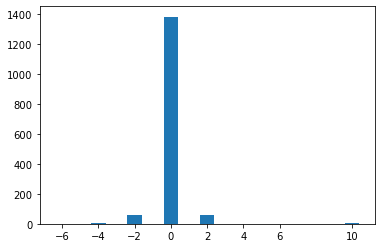

In [611]:
import matplotlib.pyplot as plt

labels, counts = np.unique(comp["DirectionBinDifference"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

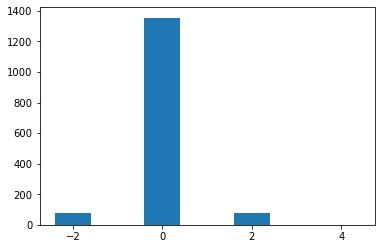

In [612]:
labels, counts = np.unique(comp["SpeedBinDifference"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [613]:
wrong = comp.query('SpeedBinDifference in [-1,1]')

error = len(wrong) / comp.shape[0] * 100

print("Percentage of bins wrong:")
print(error)


Percentage of bins wrong:
0.0


In [614]:
wrong = comp.query('DirectionBinDifference in [-1,1]')

error = len(wrong) / comp.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
0.0


In [615]:
wrong = comp.query('DirectionBinDifference != 0 or SpeedBinDifference != 0')

error = len(wrong) / comp.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
17.495029821073558


In [616]:
wrong = comp.query('SpeedBinDifference in [-1,1]')
len(wrong)

0

In [617]:
wrong = comp.query('DirectionBinDifference in [-1,1]')
len(wrong)

0

In [618]:
comp.shape[0]

1509

In [619]:
wrong = comp.query('DirectionBinDifference == -1')
len(wrong) / comp.shape[0] * 100

0.0

In [620]:
wrong = comp.query('DirectionBinDifference == 1')
len(wrong) / comp.shape[0] * 100

0.0

In [621]:
wrong = comp.query('SpeedBinDifference == -1')
len(wrong) / comp.shape[0] * 100

0.0

In [622]:
wrong = comp.query('SpeedBinDifference == 1')
len(wrong) / comp.shape[0] * 100

0.0

In [623]:
wrong = comp.query('DirectionBinDifference != 0 and SpeedBinEqual == True')

error = len(wrong) / comp.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
7.289595758780649


In [624]:
wrong = comp.query('DirectionBinDifference != 0')

error = len(wrong) / comp.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
8.416169648774023


In [625]:
from random import randint
from statistics import mean

def correct_wind_speed_errors(predicted_bin):
#     value_1 = randint(0, 100)
#     if value_1 <= 12:
#         predicted_bin += 1
    return predicted_bin


def correct_wind_direction_errors(predicted_bin):
    value_1 = randint(0, 100)
    if value_1 <= 12:
        value_2 = randint(0,1)
        if value_2 == 1:
            predicted_bin = math.degrees(math.radians(predicted_bin) + math.radians(60))
        else:
            predicted_bin = math.degrees(math.radians(predicted_bin) - math.radians(60))
            
    return predicted_bin

all_predictions['CorrectedPredictedSpeedBin'] = all_predictions['PredictedSpeedBin'].apply(correct_wind_speed_errors)
all_predictions['CorrectedPredictedDirectionBin'] = all_predictions['PredictedDirectionBin'].apply(correct_wind_direction_errors)

In [626]:
comp_2 = pd.DataFrame()

comp_2['WindSpeedMean'] = data['WindSpeedMean']
comp_2['WindDirectionMean'] = data['WindDirectionMean']

comp_2['PredictedWindSpeedMean'] = all_predictions['WindSpeedMean']
comp_2['PredictedWindDirectionMean'] = all_predictions['WindDirectionMean']

comp_2['SpeedBin'] = data['SpeedBin']
comp_2['DirectionBin'] = data['DirectionBin']
comp_2['PredictedSpeedBin'] = all_predictions["PredictedSpeedBin"] 
comp_2['PredictedDirectionBin'] = all_predictions["PredictedDirectionBin"] 

comp_2.dropna(inplace=True)
comp_2['SpeedBinEqual'] = comp_2['SpeedBin'] == comp_2["PredictedSpeedBin"]
comp_2['DirectionBinEqual'] = comp_2['DirectionBin'] == comp_2["PredictedDirectionBin"]

comp_2['SpeedBinDifference'] = (comp_2["PredictedSpeedBin"] - comp_2['SpeedBin'])
comp_2['DirectionBinDifference'] = ((comp_2['DirectionBin'] - comp_2["PredictedDirectionBin"]) / 30)


comp_2['SpeedDifference'] = data['WindSpeedMean'] - all_predictions['WindSpeedMean']
comp_2['DirectionDifference'] = (data['WindDirectionMean'].apply(math.radians) - all_predictions['WindDirectionMean'].apply(math.radians)).apply(math.degrees)


comp_2.query('DirectionBinEqual == False or SpeedBinEqual == False')

,WindSpeedMean,WindDirectionMean,PredictedWindSpeedMean,PredictedWindDirectionMean,SpeedBin,DirectionBin,PredictedSpeedBin,PredictedDirectionBin,SpeedBinEqual,DirectionBinEqual,SpeedBinDifference,DirectionBinDifference,SpeedDifference,DirectionDifference
dtTimeStamp,,,,,,,,,,,,,,
2019-08-02 09:40:00,3.207407,253.970370,3.1605,291.545736,3.5,240.0,3.5,300.0,True,False,0.0,-2.0,0.046904,-37.575366
2019-08-02 10:10:00,2.781481,156.262963,3.40073,214.398796,3.5,180.0,3.5,240.0,True,False,0.0,-2.0,-0.619251,-58.135833
2019-08-02 10:20:00,2.929630,163.881481,2.54561,145.139132,3.5,180.0,3.5,120.0,True,False,0.0,2.0,0.384019,18.742349
2019-08-02 10:40:00,3.003704,262.337037,3.05152,185.402084,3.5,240.0,3.5,180.0,True,False,0.0,2.0,-0.0478117,76.934953
2019-08-02 11:00:00,2.592593,251.511111,3.11571,306.828435,3.5,240.0,3.5,300.0,True,False,0.0,-2.0,-0.523122,-55.317324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-14 01:30:00,3.003704,265.955556,3.24793,273.381319,3.5,240.0,3.5,300.0,True,False,0.0,-2.0,-0.244223,-7.425764
2019-08-14 01:40:00,2.666667,281.018519,2.93517,264.296167,3.5,300.0,3.5,240.0,True,False,0.0,2.0,-0.268508,16.722352
2019-08-14 15:20:00,3.088889,210.522222,2.99777,209.999892,3.5,240.0,3.5,180.0,True,False,0.0,2.0,0.0911139,0.522330


In [627]:
print(mean(comp_2["DirectionBinDifference"]))

print(mean(comp_2["SpeedBinDifference"]))


print(max(comp_2["SpeedBinDifference"]))

print(max(comp_2["DirectionBinDifference"]))

print(min(comp_2["SpeedBinDifference"]))

print(min(comp_2["DirectionBinDifference"]))

0.017229953611663355
0.0066269052352551355
4.0
10.0
-2.0
-6.0


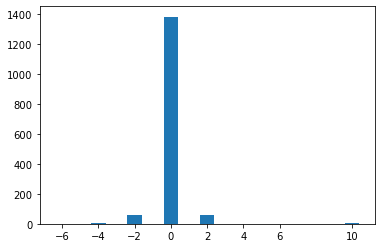

In [628]:
labels, counts = np.unique(comp_2["DirectionBinDifference"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

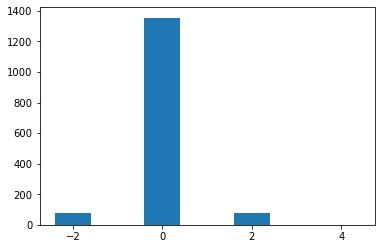

In [629]:
labels, counts = np.unique(comp_2["SpeedBinDifference"], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

In [630]:
wrong = comp_2.query('SpeedBinDifference != 0')

error = len(wrong) / comp_2.shape[0] * 100

print("Percentage of bins wrong:")
print(error)


Percentage of bins wrong:
10.205434062292909


In [631]:
wrong = comp_2.query('SpeedBinDifference != 0')
len(wrong)

154

In [632]:
wrong = comp_2.query('DirectionBinDifference != 0 or SpeedBinDifference != 0')

error = len(wrong) / comp_2.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
17.495029821073558


Text(0.5, 1.0, 'Real vs Predictions')

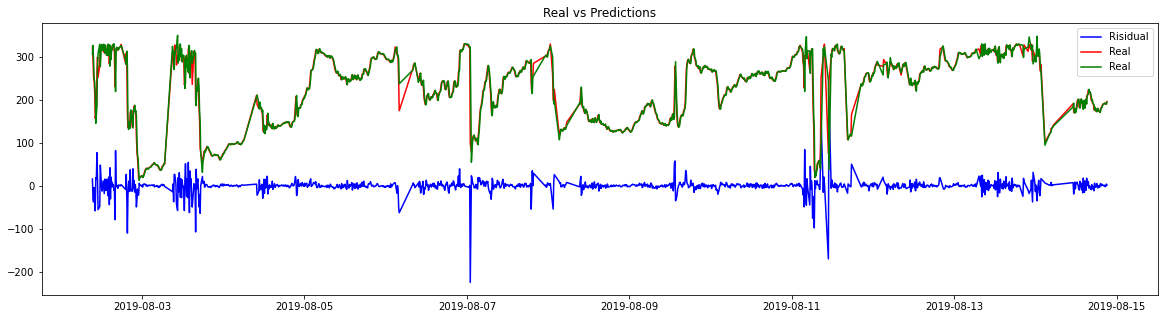

In [633]:
plt.figure(figsize=(20,5))
plt.plot(comp_2["DirectionDifference"], color='blue', label='Risidual')
plt.plot(comp_2['WindDirectionMean'], color='red', label='Real')
plt.plot(comp_2['PredictedWindDirectionMean'], color='green', label='Real')
plt.legend(loc='best')
plt.title('Real vs Predictions')

Text(0.5, 1.0, 'Real vs Predictions')

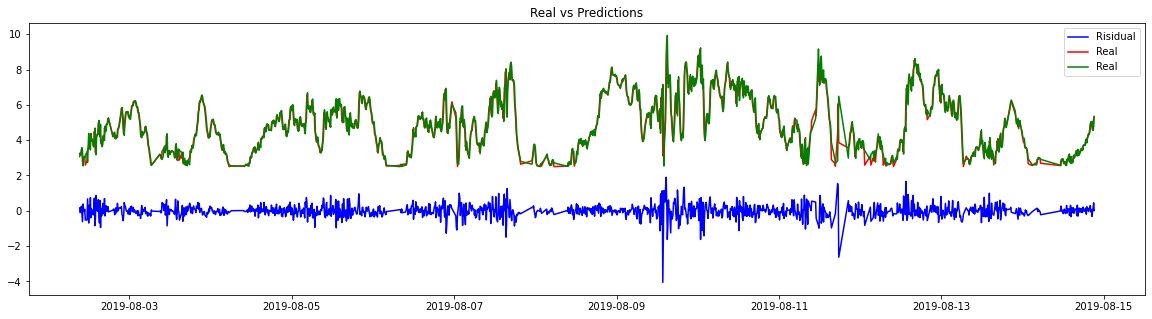

In [634]:
plt.figure(figsize=(20,5))
plt.plot(comp_2["SpeedDifference"], color='blue', label='Risidual')
plt.plot(comp_2['WindSpeedMean'], color='red', label='Real')
plt.plot(comp_2['PredictedWindSpeedMean'], color='green', label='Real')
plt.legend(loc='best')
plt.title('Real vs Predictions')

<AxesSubplot:>

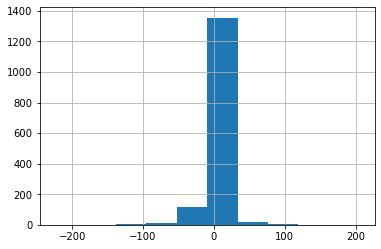

In [635]:
comp_2["DirectionDifference"].hist()


<AxesSubplot:>

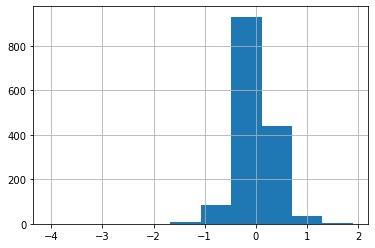

In [636]:
comp_2["SpeedDifference"].hist()

In [644]:
wrong = comp_2.query('DirectionBinEqual == False and SpeedBinEqual == True')

error = len(wrong) / comp_2.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
7.289595758780649


In [638]:
wrong = comp_2.query('DirectionBinDifference in [-1,1]')

error = len(wrong) / comp_2.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
0.0


In [639]:
wrong = comp_2.query('DirectionBinDifference in [-1,1] or SpeedBinDifference in [-1,1]')

error = len(wrong) / comp_2.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
0.0


In [640]:
np.std(comp_2["DirectionBinDifference"])

0.828402384756932

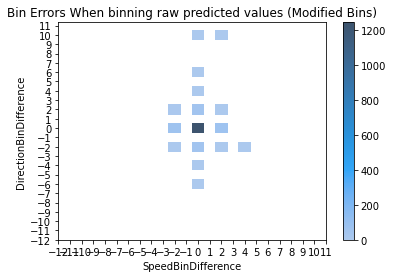

In [641]:
import seaborn as sns

g = sns.histplot(comp_2, x="SpeedBinDifference", y="DirectionBinDifference", discrete=True, cbar=True)
g.set_xticks(range(-12,12))#
g.set_yticks(range(-12,12))# <--- set the ticks first
g.set_title('Bin Errors When binning raw predicted values (Modified Bins)')

fig = g.get_figure()
fig.savefig("average_bin_errors_big_bin.png")

In [642]:
wrong = comp_2.query('DirectionBinEqual == False and SpeedBinEqual == False')

error = len(wrong) / comp_2.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
1.126573889993373


In [643]:
wrong = comp_2.query('DirectionBinEqual == False or SpeedBinEqual == False')

error = len(wrong) / comp_2.shape[0] * 100

print("Percentage of bins wrong:")
print(error)

Percentage of bins wrong:
17.495029821073558
